In [2]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
#import ipywidgets as widgets
import numpy as np

In [31]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Mar  9 2019 15:06:42
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [32]:
sim.t = 0
sim.move_to_com()
Noutputs = 2000
years = 20000.
energy_0 = sim.calculate_energy()
energy_deltas = np.zeros(Noutputs)
angular_m = np.zeros((Noutputs,3))
am_i = sim.calculate_angular_momentum()
am_i_tot = np.sqrt(np.square(am_i[0])+np.square(am_i[1])+np.square(am_i[2]))
times = np.zeros(Noutputs)
i = 0
for time in np.linspace(0,years,Noutputs):
    #print(time)
    
    sim.integrate(time)
    energy_deltas[i] = sim.calculate_energy()- energy_0
    angular_m[i,:] = np.asarray(sim.calculate_angular_momentum())-np.asarray(am_i)
    times[i] = time
    i += 1
tot_am = np.sqrt(np.square(angular_m[:,0])+np.square(angular_m[:,1])+np.square(angular_m[:,2]))

In [40]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

<IPython.core.display.Javascript object>


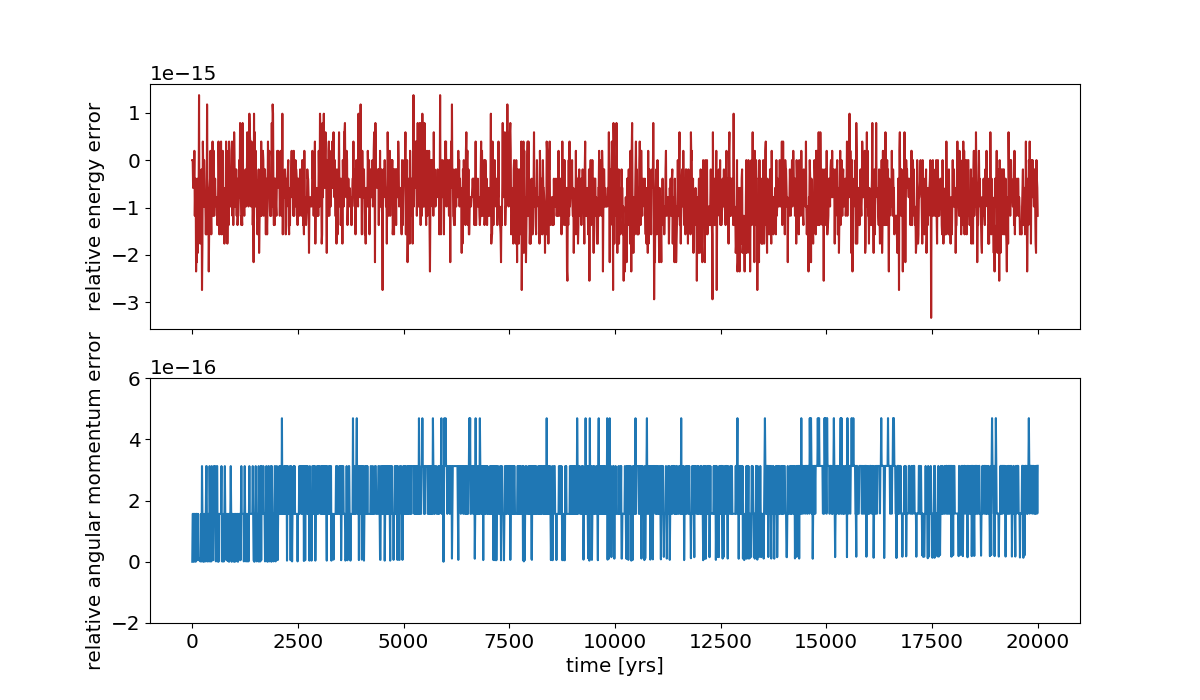

In [42]:
#ENERGY UNIT mSun AU^2 / yrs^2
%matplotlib notebook


fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(211)
#ax1.set_xlabel("time [yrs]")
ax1.set_ylabel("relative energy error")
plt.setp(ax1.get_xticklabels(), visible=False)

plt.plot(times, energy_deltas/energy_0,color='firebrick');



ax2 = plt.subplot(212,sharex=ax1)
ax2.set_xlabel("time [yrs]")
ax2.set_ylabel("relative angular momentum error")
ax2.set_ylim((-2e-16,6e-16))

plt.plot(times, tot_am/am_i_tot);

In [19]:
print(angular_m[:10,:])
print(tot_am[0:10])
print(angular_m.shape)
print(tot_am.shape)

[[0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]
 [0.00058336 0.00018486 0.02220644]]
[0.02297465 0.02297465 0.02297465 0.02297465 0.02297465 0.02297465
 0.02297465 0.02297465 0.02297465 0.02297465]
(200, 3)
(200,)


<IPython.core.display.Javascript object>


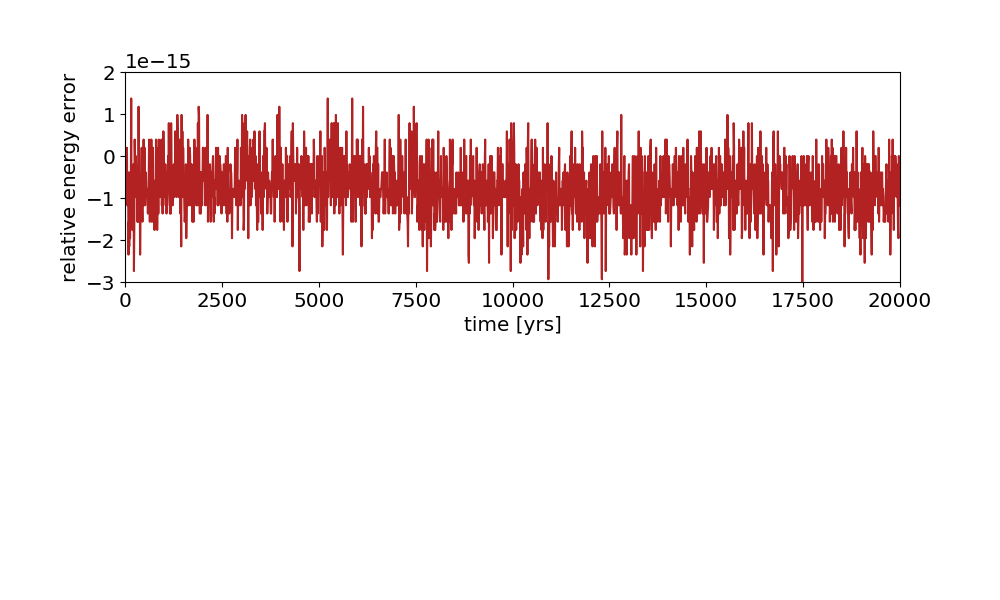

In [45]:
%matplotlib notebook


fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(211)
ax1.set_xlabel("time [yrs]")
ax1.set_ylabel("relative energy error")
ax1.set_xlim((0,20000))
ax1.set_ylim((-3e-15,2e-15))


plt.plot(times, energy_deltas/energy_0,color='firebrick');



